---
title: coal_classification
last_modified_at: 2020-07-28
category: coal
tags:
    - deep learning
    - image detection
    - coal
    - IoT
toc: true
---

### STEP 1. Load Dataset
---

In [1]:
import os
train_dir = './input/dataset1/train'
validation_dir ='./input/dataset1/test'

train_1_dir = os.path.join(train_dir, '연갈탄')

train_2_dir = os.path.join(train_dir, '유연탄')

validation_1_dir = os.path.join(validation_dir, '연갈탄')

validation_2_dir = os.path.join(validation_dir, '유연탄')

In [2]:
train_1_fnames = os.listdir(train_1_dir)
print(train_1_fnames[:10])

train_2_fnames = os.listdir(train_2_dir)
train_2_fnames.sort()
print(train_2_fnames[:10])

['0.jpg', '1.jpg', '11.jpg', '12.jpg', '14.jpg', '15.jpg', '17.jpg', '18.jpg', '20.jpg', '21.jpg']
['10.png', '100.png', '101.png', '102.png', '104.png', '105.png', '107.png', '108.png', '109.png', '110.png']


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4
pic_index = 0

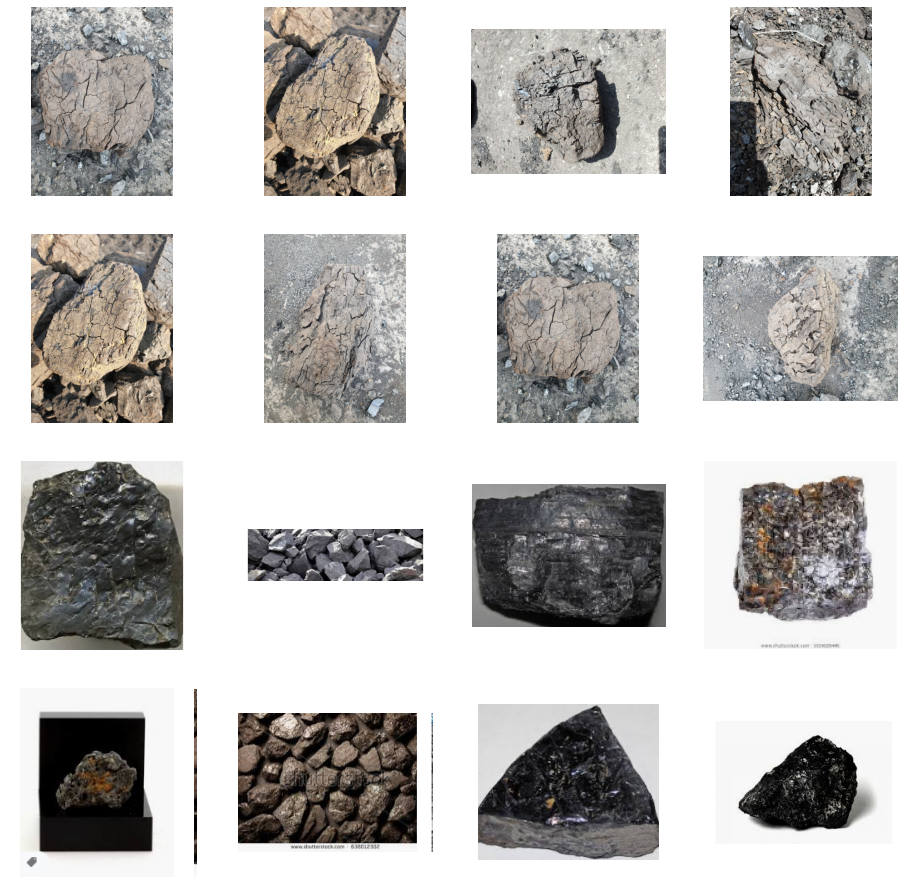

In [4]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_1_pix = [os.path.join(train_1_dir, fname) 
                for fname in train_1_fnames[pic_index-8:pic_index]]
next_2_pix = [os.path.join(train_2_dir, fname) 
                for fname in train_2_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_1_pix+next_2_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

### STEP 2. 전처리 (ImageDataGenerator)
---

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=35,
        
        class_mode='binary')


validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=35,
        class_mode='binary')

### STEP 3. 모델 정의 (Sequential)
---

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [6]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

### STEP 4. 컴파일 (compile)
---

In [8]:
model.compile(loss="binary_crossentropy", optimizer="nadam",metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### STEP 5. 학습 (fit)
---

In [10]:
history=model.fit(train_generator,
epochs = 30,
validation_data = validation_generator
)

Epoch 1/30
80/80 [==============================] - 26s 321ms/step - loss: -213.0691 - acc: 0.7968 - val_loss: 4577.6045 - val_acc: 0.7500
Epoch 2/30
80/80 [==============================] - 20s 253ms/step - loss: -107998.4375 - acc: 0.8377 - val_loss: 767436.6875 - val_acc: 0.7000
Epoch 3/30
80/80 [==============================] - 21s 259ms/step - loss: -2228492.3191 - acc: 0.8502 - val_loss: 13056475.0000 - val_acc: 0.7000
Epoch 4/30
80/80 [==============================] - 20s 255ms/step - loss: -14808893.1636 - acc: 0.8459 - val_loss: 16094125.0000 - val_acc: 0.8000
Epoch 5/30
80/80 [==============================] - 20s 255ms/step - loss: -60858915.8639 - acc: 0.8513 - val_loss: 65229192.0000 - val_acc: 0.7500
Epoch 6/30
80/80 [==============================] - 21s 264ms/step - loss: -196978636.0450 - acc: 0.8502 - val_loss: 134408960.0000 - val_acc: 0.8000
Epoch 7/30
80/80 [==============================] - 21s 264ms/step - loss: -499968936.2815 - acc: 0.8560 - val_loss: 4015826

<Figure size 432x288 with 0 Axes>

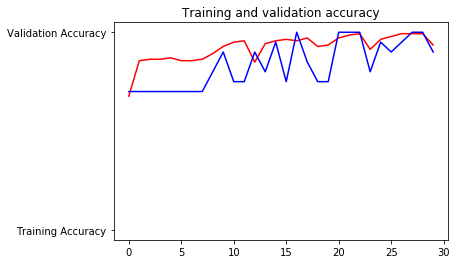

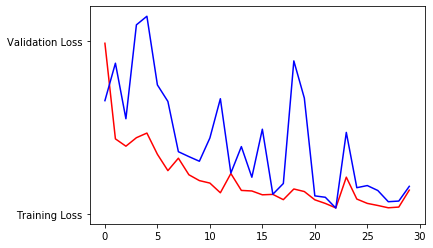

<Figure size 432x288 with 0 Axes>

In [11]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()



In [22]:

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model


def load_image(filename):
	img = load_img(filename, target_size=(150,150))
	img = img_to_array(img)
	img = img.reshape(1,150,150, 3)
	img = img.astype('float32')
	return img

test_dir ='./input/dataset1/valid'
test_1_dir = os.path.join(test_dir, '연갈탄')
test_2_dir = os.path.join(test_dir, '유연탄')

test_1_fnames = os.listdir(test_1_dir)
test_2_fnames = os.listdir(test_2_dir)

test_1_pix = [os.path.join(test_1_dir, fname) 
                for fname in test_1_fnames]
test_2_pix = [os.path.join(test_2_dir, fname) 
                for fname in test_2_fnames]
p1=0

for j in test_1_pix:
    img = load_image(j)
    result = model.predict(img)
    if(result[0]==0):
        p1=p1+1
p2=0
for j in test_2_pix:
    img = load_image(j)
    result = model.predict(img)
    if(result[0]==1):
        p2=p2+1

In [23]:
print(p1)

3


In [24]:
print(p2)

7


### Data augmentation 
---

In [9]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')
# next_1_pix = [os.path.join(train_1_dir, fname) 
#                 for fname in train_1_fnames]
# for j in next_1_pix:
#     img = load_img(j)
#     y = img_to_array(img)
#     x = y.reshape((1,) + y.shape)
    
#     i = 0
#     name = j.split('\\')[2]
#     for batch in datagen.flow(x, batch_size=1,
#                               save_to_dir='./input/dataset3/변형연갈탄', save_prefix= str(name)):
#         i += 1
#         if i > 120:
#             break  


In [10]:
# datagen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')
# next_2_pix = [os.path.join(train_2_dir, fname) 
#                 for fname in train_2_fnames]
# for j in next_2_pix:
#     img = load_img(j)
#     x = img_to_array(img)
#     x = x.reshape((1,) + x.shape)
    
#     i = 0
#     name = j.split('\\')[2]
#     for batch in datagen.flow(x, batch_size=1,
#                               save_to_dir='./input/dataset3/변형유연탄', save_prefix= str(name)):
#         print(i)
#         i += 1
#         if i > 20:
#             break  


In [1]:
train_dir = './input/dataset3/train'
validation_dir ='./input/dataset3/test'

train_1_dir = os.path.join(train_dir, '연갈탄')

train_2_dir = os.path.join(train_dir, '유연탄')

validation_1_dir = os.path.join(validation_dir, '연갈탄')

validation_2_dir = os.path.join(validation_dir, '유연탄')

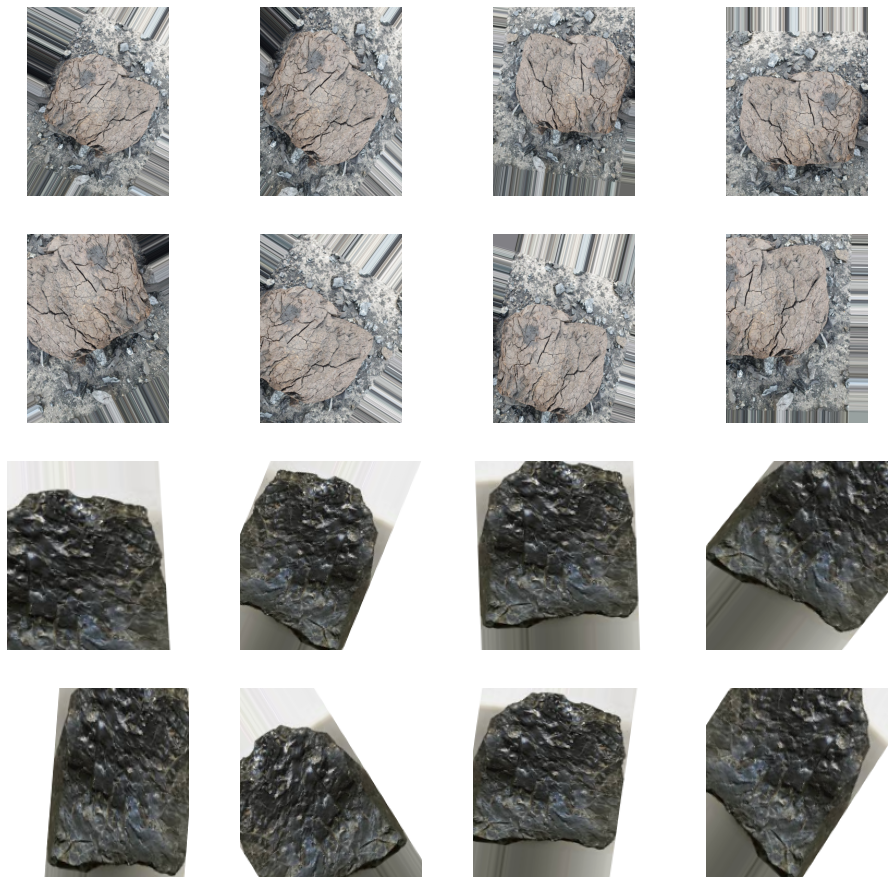

In [4]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_1_pix = [os.path.join(train_1_dir, fname) 
                for fname in train_1_fnames[pic_index-8:pic_index]]
next_2_pix = [os.path.join(train_2_dir, fname) 
                for fname in train_2_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_1_pix+next_2_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=32,
        
        class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 4904 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [12]:
history=model.fit(train_generator,
epochs = 17,
validation_data = validation_generator
)

Epoch 1/17
154/154 [==============================] - 74s 478ms/step - loss: 0.3611 - acc: 0.8442 - val_loss: 0.0944 - val_acc: 0.9500
Epoch 2/17
154/154 [==============================] - 72s 468ms/step - loss: 0.1301 - acc: 0.9549 - val_loss: 0.1623 - val_acc: 0.9000
Epoch 3/17
154/154 [==============================] - 68s 443ms/step - loss: 0.0863 - acc: 0.9692 - val_loss: 0.1156 - val_acc: 0.9500
Epoch 4/17
154/154 [==============================] - 70s 452ms/step - loss: 0.0431 - acc: 0.9857 - val_loss: 0.1584 - val_acc: 0.9000
Epoch 5/17
154/154 [==============================] - 67s 432ms/step - loss: 0.0280 - acc: 0.9925 - val_loss: 0.1269 - val_acc: 0.9000
Epoch 6/17
154/154 [==============================] - 65s 422ms/step - loss: 0.3441 - acc: 0.9392 - val_loss: 0.0588 - val_acc: 0.9500
Epoch 7/17
154/154 [==============================] - 67s 435ms/step - loss: 0.0611 - acc: 0.9806 - val_loss: 0.1847 - val_acc: 0.9000
Epoch 8/17
154/154 [==============================] - 6

<Figure size 432x288 with 0 Axes>

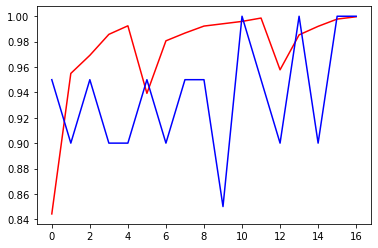

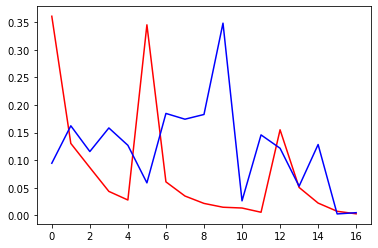

<Figure size 432x288 with 0 Axes>

In [13]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.figure()


plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.figure()



In [24]:

from tenkeras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model


def load_image(filename):
	img = load_img(filename, target_size=(150,150))
	img = img_to_array(img)
	img = img.reshape(1,150,150, 3)
	img = img.astype('float32')
	return img

test_dir ='./input/dataset3/valid'
test_1_dir = os.path.join(test_dir, '연갈탄')
test_2_dir = os.path.join(test_dir, '유연탄')

test_1_fnames = os.listdir(test_1_dir)
test_2_fnames = os.listdir(test_2_dir)

test_1_pix = [os.path.join(test_1_dir, fname) 
                for fname in test_1_fnames]
test_2_pix = [os.path.join(test_2_dir, fname) 
                for fname in test_2_fnames]
p1=0

for j in test_1_pix:
    img = load_image(j)
    result = model.predict(img)
    if(result[0]==0):
        p1=p1+1
p2=0
for j in test_2_pix:
    img = load_image(j)
    result = model.predict(img)
    if(result[0]==1):
        p2=p2+1

In [25]:
print(p1)

3


In [26]:
print(p2)

7


### 모델 변경
---

In [12]:
from keras import layers
additional_model = models.Sequential()
additional_model.add(base_model)
additional_model.add(layers.Flatten())
additional_model.add(layers.Dense(2048, activation='relu'))
additional_model.add(layers.Dense(1, activation='sigmoid'))
 
additional_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              16779264  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2049      
Total params: 31,496,001
Trainable params: 16,781,313
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
from keras import layers
additional_model = models.Sequential()
additional_model.add(base_model)
additional_model.add(layers.Flatten())
additional_model.add(layers.Dense(2048, activation='relu'))
additional_model.add(layers.Dense(1024, activation='relu'))
additional_model.add(layers.Dense(256, activation='relu'))
additional_model.add(layers.Dense(1, activation='sigmoid'))
 
additional_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              16779264  
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 39,164,481
Trainable params: 19,140,097
Non-trainable params: 20,024,384
_________________________________

### 최종 결과
---

![png](coal_classification.png)


### 마치며

라즈베리파이 석탄 분류기에 사용할 최적의 모델을 찾아 봤습니다.

읽어주셔서 감사합니다.